In [121]:
import pandas as pd
import requests
import geopandas as gpd

# !pip install xlrd==1.2.0
# !pip install convertbng
from convertbng.util import convert_lonlat

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

In [98]:
# # get original data in excel format and save it as csv

# url_central_london = "https://cycling.data.tfl.gov.uk/CycleCountsProgramme/Central%20London%20(area).xlsx"
# url_inner_london = "https://cycling.data.tfl.gov.uk/CycleCountsProgramme/Inner%20London%20(area).xlsx"
# url_outer_london = "https://cycling.data.tfl.gov.uk/CycleCountsProgramme/Outer%20London%20(area).xlsx"

# def get_count_data(url:str, dest:str):
#     resp = requests.get(url)
#     with open("data/" + dest + '.xlsx', 'wb') as output:
#         output.write(resp.content)

# get_count_data(url_central_london, "central_london")
# get_count_data(url_inner_london, "inner_london")
# get_count_data(url_outer_london, "outer_london")

# #transform excel into csv
# def excel_to_csv(file_name:str):
#     df = pd.read_excel(file_name + ".xlsx", sheet_name = 1)
#     df.to_csv(file_name + '.csv', sep='\t', index = False)
#     return df

# central_london = excel_to_csv("central_london")
# inner_london = excel_to_csv("inner_london")
# outer_london = excel_to_csv("outer_london")

# #create a column with area
# central_london['area'] = "central"
# inner_london['area'] = "inner"
# outer_london['area'] = "outer"

# #merge into one dataframe
# london = pd.concat([central_london, inner_london, outer_london], ignore_index=True)

# #save the results as one dataset
# london.to_csv('data/london_counts.csv', sep='\t', index=False)

In [188]:
london = pd.read_csv("data/london_counts.csv", sep='\t', low_memory=False)

In [182]:
print(london.shape)
london.head(3)

(1433900, 20)


,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of normal cycles,Number of cycle hire bikes,Total cycles,area,Survey wave (year),Number of private cycles,Number of male cycles,Number of female cycles,Number of unknown cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (South of Thorney Street),2014-01-22 00:00:00,Dry,2130 - 2145,Evening (19:00-22:00),Northbound,21,30,0.0,0.0,0.0,central,NaN,NaN,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (South of Thorney Street),2014-01-22 00:00:00,Dry,2145 - 2200,Evening (19:00-22:00),Northbound,21,45,0.0,0.0,0.0,central,NaN,NaN,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (South of Thorney Street),2014-01-24 00:00:00,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,0.0,0.0,0.0,central,NaN,NaN,NaN,NaN,NaN


In [164]:
print(f'Number of unique counter locations in whole London: {london.Location.nunique()}')

Number of unique counter locations in whole London: 1506


In [160]:
#check if some columns are empty
london.isna().sum().sort_values(ascending=False)

Number of unknown cycles          1115712
Number of male cycles             1115712
Number of female cycles           1115712
Number of private cycles          1001516
Number of normal cycles            750700
Equivalent financial quarter       750572
Survey wave (calendar quarter)     750572
Survey wave (year)                 683328
Number of cycle hire bikes         318316
Weather                             17476
Survey date                         14076
Total cycles                          253
Start minute                            0
Direction                               0
Period                                  0
Time                                    0
Location                                0
Site ID                                 0
Start hour                              0
dtype: int64

In [342]:
london.Weather.value_counts()

Dry                   1185633
Wet                    145670
Fine                    21786
Sunny                   11304
Cloudy                   9442
                       ...   
Dryish                      2
Mixed                       2
Cloudy + Rain               2
Too Cold                    2
Wet And Very Windy          2
Name: Weather, Length: 415, dtype: int64

In [189]:
london.drop(columns=['Number of unknown cycles', 'Number of male cycles', 'Number of female cycles',
                    'Number of private cycles', 'Number of normal cycles'], inplace=True)

In [156]:
print(f'Number of records for a random station in 2014:\
      {len(london[(london["Location"]=="Millbank (South of Thorney Street)")&\
      (london["Survey date"].str.contains("2014"))])}')

print(f'Number of records for a random station in 2015:\
      {len(london[(london["Location"]=="Millbank (South of Thorney Street)")&\
      (london["Survey date"].str.contains("2015"))])}')

print(f'Number of records for a random station in 2018:\
      {len(london[(london["Location"]=="Millbank (South of Thorney Street)")&\
      (london["Survey date"].str.contains("2018"))])}')

print(f'Number of records for a random station in 2019:\
      {len(london[(london["Location"]=="Millbank (South of Thorney Street)")&\
      (london["Survey date"].str.contains("2019"))])}')

print(f'Number of records for a random station in 2020:\
      {len(london[(london["Location"]=="Millbank (South of Thorney Street)")&\
      (london["Survey date"].str.contains("2020"))])}')

Number of records for a random station in 2014:      512
Number of records for a random station in 2015:      512
Number of records for a random station in 2018:      512
Number of records for a random station in 2019:      512
Number of records for a random station in 2020:      128


In [153]:
london[(london["Location"]=="Millbank (South of Thorney Street)")&
      (london["Survey date"].str.contains("2019"))]['Survey date'].value_counts()

2019-11-21 00:00:00    64
2019-11-20 00:00:00    64
2019-09-17 00:00:00    56
2019-06-24 00:00:00    56
2019-02-26 00:00:00    48
2019-02-25 00:00:00    48
2019-06-14 00:00:00    48
2019-09-18 00:00:00    40
2019-02-27 00:00:00    32
2019-09-20 00:00:00    32
2019-06-21 00:00:00    24
Name: Survey date, dtype: int64

In [190]:
#drop records without date, because they will not be convertable to datetime format
london.drop(london[london['Survey date'].isna()].index, inplace=True)

In [191]:
#create a datetime column
london['date'] = pd.to_datetime(london['Survey date'], infer_datetime_format=True, errors='coerce')

In [335]:
#we will only use central london for the model
c_london = london[london.area=='central']
c_london = c_london.merge(sites, how='left', left_on='Site ID', right_on='UnqID')

In [337]:
agg_col = {'Total cycles':['sum']}
# df_grouped = c_london.groupby(['Site ID','date', 'Borough']).agg(agg_col).reset_index()
# df_grouped.columns = ['Site', 'date', 'Borough', 'Total cycles']
df_grouped = c_london.groupby(['date', 'Borough']).agg(agg_col).reset_index()
df_grouped.columns = ['date', 'Borough', 'Total cycles']

In [338]:
df_grouped.index = df_grouped.date.values

In [339]:
df_grouped = df_grouped[(df_grouped['date']<pd.Timestamp(2020,12,1))]

In [340]:
df_grouped.drop(columns=['date'], inplace=True)

In [347]:
london.shape

(1419824, 16)

<Figure size 432x288 with 0 Axes>

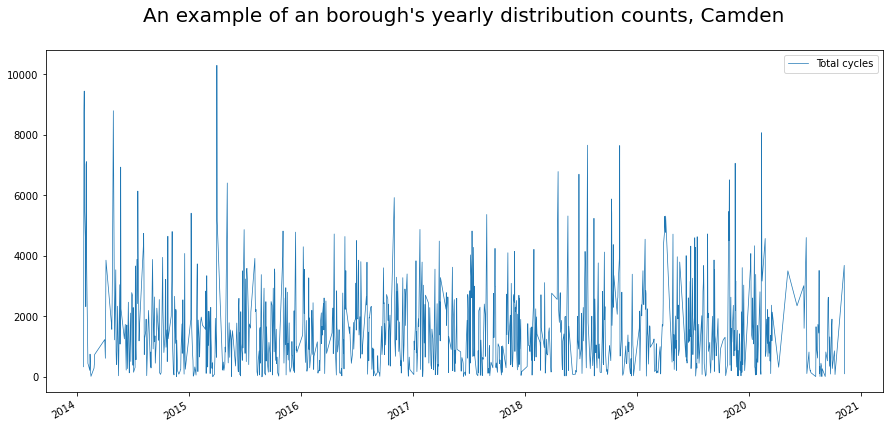

In [346]:
plt.figure()
ax = df_grouped[df_grouped.Borough=="Camden"].plot(label='Camden', figsize=(15,7), linewidth=0.7)
ax.set_title("An example of an borough's yearly distribution counts, Camden\n ", fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
plt.legend()

# ax.set(xlabel="date", ylabel="Total cycles")

In [348]:
#we will only use central london for the model
c_london = london[london.area=='central']
c_london = c_london.merge(sites, how='left', left_on='Site ID', right_on='UnqID')

In [349]:
agg_col = {'Total cycles':['sum']}
df_grouped = c_london.groupby(['Time', 'Borough']).agg(agg_col).reset_index()
df_grouped.columns = ['Time', 'Borough', 'Total cycles']

In [353]:
df_grouped.index = df_grouped.Time.values
df_grouped

,Time,Borough,Total cycles
0600 - 0615,0600 - 0615,Camden,3605.0
0600 - 0615,0600 - 0615,City of London,9482.0
0600 - 0615,0600 - 0615,Hackney,109.0
0600 - 0615,0600 - 0615,Islington,2030.0
0600 - 0615,0600 - 0615,Lambeth,3361.0
...,...,...,...
2145 - 2200,2145 - 2200,Islington,5194.0
2145 - 2200,2145 - 2200,Lambeth,5969.0
2145 - 2200,2145 - 2200,Southwark,7823.0
2145 - 2200,2145 - 2200,Tower Hamlets,152.0


<Figure size 432x288 with 0 Axes>

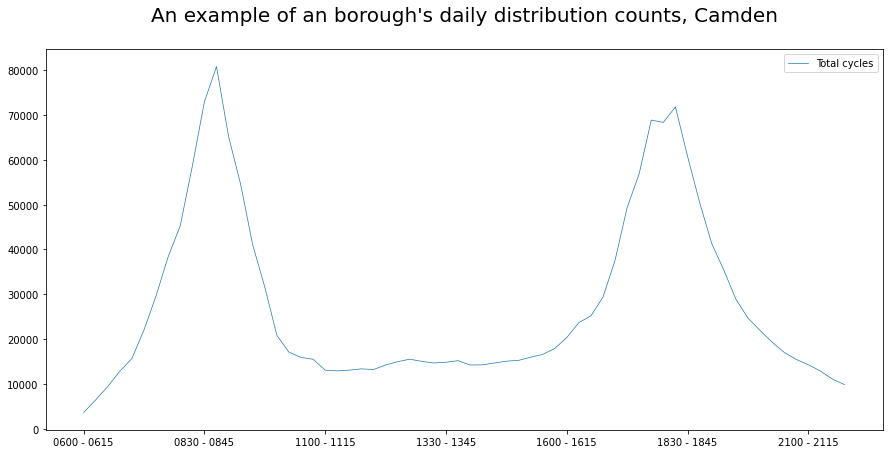

In [354]:
plt.figure()
ax = df_grouped[df_grouped.Borough=="Camden"].plot(label='Camden', figsize=(15,7), linewidth=0.7)
ax.set_title("An example of an borough's daily distribution counts, Camden\n ", fontdict={'fontsize':'20', 'fontweight':'3'})  #provide a title
plt.legend()

In [ ]:
### Sites locations

In [194]:
sites = pd.read_excel("https://cycling.data.tfl.gov.uk/CycleCountsProgramme/X%20-%20Count%20sites%20list.xlsx")

In [57]:
print(sites.shape)
sites.head(2)

(2006, 14)


,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Sarea,Counted2020,Counted2021,Counted2022,Counted2023,Counted2024,Counted2025
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central,NaN,NaN,NaN,NaN,NaN,NaN
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
# convert BNG Eastings and Northings to longitude, latitude (thanks, Hannah Fry!)
def bng_to_latlon(sites):
    sites['coord']= convert_lonlat(sites['Easting'], sites['Northing'])
    return sites

In [196]:
sites = sites.apply(bng_to_latlon, axis=1)

In [197]:
sites['lon'] = sites.coord.apply(lambda x: x[0][0])
sites['lat'] = sites.coord.apply(lambda x: x[1][0])

In [198]:
sites.columns

Index(['UnqID', 'ProgID', 'SurveyDescription', 'Easting', 'Northing',
       'Location', 'Borough', 'Sarea', 'Counted2020', 'Counted2021',
       'Counted2022', 'Counted2023', 'Counted2024', 'Counted2025', 'coord',
       'lon', 'lat'],
      dtype='object')

In [199]:
sites.drop(columns=['ProgID', 'SurveyDescription', 'Easting', 'Northing',
                   'Counted2020', 'Counted2021','Counted2022', 'Counted2023', 
                    'Counted2024', 'Counted2025','coord'], inplace = True)

In [200]:
sites.head(2)

,UnqID,Location,Borough,Sarea,lon,lat
0,CENCY001,Millbank (south of Thorney Street),Westminster,Central,-0.125171,51.492633
1,CENCY002,Bishopsgate,City of London,Central,-0.079218,51.519605


In [64]:
gdf_sites = gpd.GeoDataFrame(sites,
      geometry=gpd.points_from_xy(sites['lon'], sites['lat'], crs='epsg:4326'))

In [91]:
gdf_sites.to_file("data/count_locations.geojson", driver='GeoJSON')

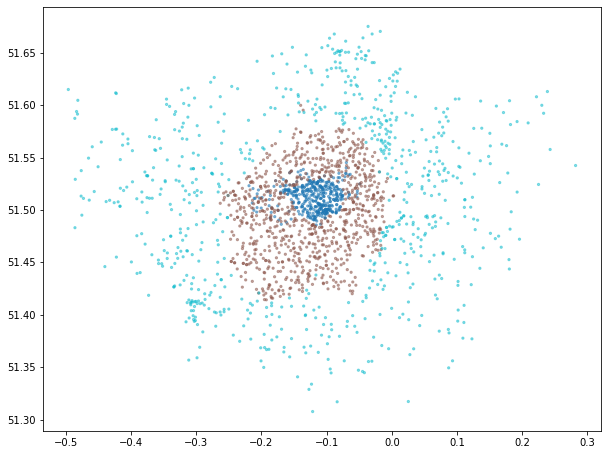

In [96]:
ax = gdf_sites.plot(column='Sarea', markersize=5, alpha=0.5, figsize=(10,8))